In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [2]:
data = pd.read_csv('dataset/news.csv')

In [7]:
data.head()

,id,headline,text
0,uid-1,Market Advances 5.12 More,NEW YORK (AP) - A prime rate reduction by New ...
1,uid-2,District Boosts Request For Anti-Terrorism Aid...,Mayor Anthony A. Williams petitioned the White...
2,uid-3,"Election? Here's How You Do It, Mate.",From our downunder perspective here in Austral...
3,uid-4,The Biggest Boom Ever,We are about to rewrite history. Unless a rece...
4,uid-5,Economic Aide Sees Uptrend,"Sedate and scholarly Dr. Arthur Burns, the ex-..."


In [9]:
len(data[data['headline'].duplicated(keep=False)].sort_values('headline'))

146

In [10]:
data = data.drop_duplicates('headline')

In [11]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = data['headline'].values
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(desc)

In [13]:
word_features = vectorizer.get_feature_names()
print(len(word_features))
print(word_features[5000:5100])

5569
['therapy', 'thesis', 'thiminesch', 'thing', 'things', 'think', 'thinking', 'thirds', 'thirst', 'thitrstlny', 'thk', 'thomas', 'thoughts', 'thousand', 'thousands', 'threat', 'threaten', 'threatens', 'thresher', 'thrift', 'thrifts', 'thrilla', 'thrive', 'thunday', 'thurmlay', 'thursday', 'thwart', 'ti', 'tiaxing', 'tibetan', 'ticket', 'ticking', 'ticks', 'tidal', 'tide', 'tie', 'tied', 'ties', 'tiffany', 'tight', 'tighten', 'tightened', 'tightening', 'tightens', 'tighter', 'tiie', 'time', 'timed', 'times', 'timing', 'tip', 'tips', 'tire', 'tires', 'title', 'tjc', 'tjl', 'tlc', 'tljinn', 'tm', 'toasijutgton', 'toasjjmgtok', 'toasliinglon', 'toasliington', 'toasljingfon', 'toasljinqtoi', 'toastimgton', 'tobacco', 'tobaccos', 'tobin', 'today', 'tokyo', 'told', 'toll', 'tomorrow', 'tone', 'tonic', 'tonkin', 'tool', 'tools', 'toosljmgtonljs', 'tops', 'tories', 'toronto', 'torrid', 'tosco', 'total', 'totaling', 'totals', 'touch', 'tough', 'toughens', 'tougher', 'tour', 'tourism', 'tours'

# Stemming
Stemming is the process of reducing a word into its stem, i.e. its root form. The root form is not necessarily a word by itself, but it can be used to generate words by concatenating the right suffix. For example, the words fish, fishes and fishing all stem into fish, which is a correct word. On the other side, the words study, studies and studying stems into studi, which is not an English word.

# Tokenizing
Tokenization is breaking the sentence into words and punctuation,

In [14]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

### Vectorization with stop words(words irrelevant to the model), stemming and tokenizing

In [15]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names()
print(len(word_features2))
print(word_features2[:50]) 

3952
["'a", "'s", 'aangel', 'ab', 'abc', 'aberr', 'abil', 'abl', 'abn', 'aboard', 'abound', 'abov', 'abreast', 'abroad', 'abu', 'abus', 'acceler', 'accentu', 'accentur', 'accept', 'access', 'accident', 'accord', 'account', 'accuraci', 'achiev', 'acquir', 'acquisit', 'act', 'action', 'activ', 'activist', 'actrad', 'actuari', 'ad', 'add', 'addi', 'addit', 'address', 'adelphia', 'adjust', 'administr', 'admonish', 'adob', 'adopt', 'adrenalin', 'advanc', 'advertis', 'advic', 'advis']


In [16]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(desc)
words = vectorizer3.get_feature_names()

For this, we will use k-means clustering algorithm.

# K-means clustering

Elbow method to select number of clusters
This method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. More precisely, if one plots the percentage of variance explained by the clusters against the number of clusters, the first clusters will add much information (explain a lot of variance), but at some point the marginal gain will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion". This "elbow" cannot always be unambiguously identified. Percentage of variance explained is the ratio of the between-group variance to the total variance, also known as an F-test. A slight variation of this method plots the curvature of the within group variance.

Basically, number of clusters = the x-axis value of the point that is the corner of the "elbow"(the plot looks often looks like an elbow)

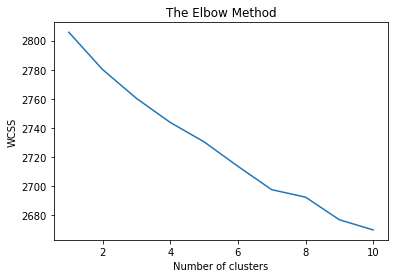

In [18]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [19]:
kmeans = KMeans(n_clusters = 6, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# We look at 6 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : fed, economi, inflat, tax, dollar, year, new, price, bank, cut, report, plan, job, econom, rise, say, profit, gain, fall, recess, growth, big, fund, hous, sale
1 : stock, trade, gain, price, dow, bond, record, rise, ralli, investor, week, tech, fall, slump, deficit, close, point, mix, day, high, small, profit, news, drop, report
2 : washington, post, thursday, octob, r, wednesday, tuesday, januari, juli, e, d, march, saturday, l, busi, sunday, septemb, august, g, friday, c, current, file, write, brief
3 : market, stock, gain, rise, price, bond, declin, ralli, currenc, advanc, week, fear, abreast, dow, street, index, trade, trader, mix, news, higher, say, futur, loss, bull
4 : rate, rise, fed, cut, mortgag, fall, low, jobless, lower, bond, fix, loan, inflat, dow, bank, economi, declin, price, drop, increas, seen, dollar, point, hope, growth
5 : s, u, news, economi, rate, deficit, trade, dollar, job, capit, say, end, gain, market, inflat, fed, bank, aid, japan, korea, econom, bond, i